# Linear Regression 

A linear regression learning algorithm example using TensorFlow library.

In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [5]:
# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Instructions for updating:
Colocations handled automatically by placer.


# Construct a linear model

In [0]:
pred = tf.add(tf.multiply(X, W), b)

In [0]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [8]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.340273947 W= 0.53637713 b= -1.2616336
Epoch: 0100 cost= 0.309864014 W= 0.5193209 b= -1.1389318
Epoch: 0150 cost= 0.282965511 W= 0.50327903 b= -1.0235289
Epoch: 0200 cost= 0.259172410 W= 0.48819122 b= -0.9149882
Epoch: 0250 cost= 0.238126442 W= 0.4740007 b= -0.8129023
Epoch: 0300 cost= 0.219510660 W= 0.46065402 b= -0.71688765
Epoch: 0350 cost= 0.203044504 W= 0.44810137 b= -0.62658423
Epoch: 0400 cost= 0.188479915 W= 0.43629527 b= -0.54165184
Epoch: 0450 cost= 0.175597072 W= 0.42519125 b= -0.46177006
Epoch: 0500 cost= 0.164202020 W= 0.4147476 b= -0.38663924
Epoch: 0550 cost= 0.154122964 W= 0.40492502 b= -0.31597686
Epoch: 0600 cost= 0.145208001 W= 0.39568672 b= -0.24951714
Epoch: 0650 cost= 0.137322664 W= 0.3869979 b= -0.18701
Epoch: 0700 cost= 0.130348131 W= 0.37882584 b= -0.12822053
Epoch: 0750 cost= 0.124179296 W= 0.37113965 b= -0.072927706
Epoch: 0800 cost= 0.118722983 W= 0.3639108 b= -0.020923246
Epoch: 0850 cost= 0.113897033 W= 0.35711172 b= 0.027988164
Epoch: 0

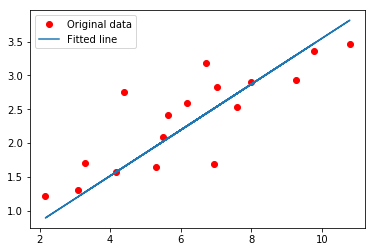

In [10]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()